In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14  
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [ ]:
# get spectra of dsa

values = {}
values['pT'] = np.linspace(1,50,100)
values['s'] = np.linspace(100, 300, 100)
values['Q'] = np.linspace(4, 10, 100)

def get_base_kins():
    base_kins = dijet.Kinematics(Q=9, z=0.4, x=0.01, s=100**2, pT=30.0, delta=0.0, phi_Dp=0.0, phi_kp=0.0)
    base_kins.y = (base_kins.Q**2)/(base_kins.s*base_kins.x)
    assert base_kins.y <= 1, 'y > 1'
    return base_kins

kins = get_base_kins()

dj = dijet.DIJET(gauss_param=0, mv_only=False)
dj_pp = dijet.DIJET(gauss_param=0, mv_only=False)
dj_pp.load_params('replica_params_pp.csv')


denom = {}
num = {}

for fit in ['dis+sidis', '+pp']:
    denom[fit] = {}
    num[fit] = {}

    for var in ['pT', 's', 'Q']:
        denom[fit][var] = []
        num[fit][var] = []

for irep in range(1, 398):
    # if irep > 100: break
    print(irep)
    # nrep = random.randint(1,398)
    dj.set_params(irep)
    dj_pp.set_params(irep)
    
    num_rep_dis = []
    num_rep_pp = []
    kins = get_base_kins()
    for pT in values['pT']:
        kins.pT = pT
        if irep == 1:
            denom['dis+sidis']['pT'].append(dj.get_xsec(kins, 'unpolarized', 'dx'))
            denom['+pp']['pT'].append(dj_pp.get_xsec(kins, 'unpolarized', 'dx'))
            
        num_rep_dis.append(dj.get_xsec(kins, 'DSA', 'dx'))
        num_rep_pp.append(dj_pp.get_xsec(kins, 'DSA', 'dx'))
        
    num['dis+sidis']['pT'].append(num_rep_dis)
    num['+pp']['pT'].append(num_rep_pp)

    num_rep_dis = []
    num_rep_pp = []
    kins = get_base_kins()
    for roots in values['s']:
        kins.s = roots**2
        kins.y = (kins.Q**2)/(kins.s*kins.x)
        assert kins.y <= 1, 'y > 1'
        
        if irep == 1:
            denom['dis+sidis']['s'].append(dj.get_xsec(kins, 'unpolarized', 'dx'))
            denom['+pp']['s'].append(dj_pp.get_xsec(kins, 'unpolarized', 'dx'))
            
        num_rep_dis.append(dj.get_xsec(kins, 'DSA', 'dx'))
        num_rep_pp.append(dj_pp.get_xsec(kins, 'DSA', 'dx'))
        
    num['dis+sidis']['s'].append(num_rep_dis)
    num['+pp']['s'].append(num_rep_pp)

    num_rep_dis = []
    num_rep_pp = []
    kins = get_base_kins()
    for Q in values['Q']:
        kins.Q = Q
        kins.y = (kins.Q**2)/(kins.s*kins.x)
        assert kins.y <= 1, 'y > 1'
        
        if irep == 1:
            denom['dis+sidis']['Q'].append(dj.get_xsec(kins, 'unpolarized', 'dx'))
            denom['+pp']['Q'].append(dj_pp.get_xsec(kins, 'unpolarized', 'dx'))
            
        num_rep_dis.append(dj.get_xsec(kins, 'DSA', 'dx'))
        num_rep_pp.append(dj_pp.get_xsec(kins, 'DSA', 'dx'))
        
    num['dis+sidis']['Q'].append(num_rep_dis)
    num['+pp']['Q'].append(num_rep_pp)

    np.save('predictions/dsa_denom.npy', denom, allow_pickle=True)
    np.save('predictions/dsa_num.npy', num, allow_pickle=True)
    

    

Using N data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
loaded params from replica_params_old.csv
Using N data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
loaded params from replica_params_old.csv
loaded params from replica_params_pp.csv
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
1

In [13]:
# load reps and calc bands for numerator

num_data = np.load('predictions/dsa_num.npy', allow_pickle=True).item()
denom_data = np.load('predictions/dsa_denom.npy', allow_pickle=True).item()

confid = 68
num_bands = {}
ratio_bands = {}

for fit in ['dis+sidis', '+pp']:
    num_bands[fit] = {}
    ratio_bands[fit] = {}
    for obj in ['lower', 'upper', 'mean']:
        num_bands[fit][obj] = {}
        ratio_bands[fit][obj] = {}


    for var in ['pT', 's', 'Q']:
        num_bands[fit]['lower'][var] = np.percentile(np.abs(num_data[fit][var]), 0.5*(100-confid), axis=0)
        num_bands[fit]['upper'][var] = np.percentile(np.abs(num_data[fit][var]), 100 - 0.5*(100-confid), axis=0)
        num_bands[fit]['mean'][var] = np.mean(np.abs(num_data[fit][var]), axis=0)

        ratio_bands[fit]['lower'][var] = np.percentile(np.array(num_data[fit][var])/np.array(denom_data[fit][var]), 0.5*(100-confid), axis=0)
        ratio_bands[fit]['upper'][var] = np.percentile(np.array(num_data[fit][var])/np.array(denom_data[fit][var]), 100 - 0.5*(100-confid), axis=0)
        ratio_bands[fit]['mean'][var] = np.mean(np.array(num_data[fit][var])/np.array(denom_data[fit][var]), axis=0)



{'dis+sidis': {'pT': [], 's': [], 'Q': []}, '+pp': {'pT': [], 's': [], 'Q': []}}


ValueError: operands could not be broadcast together with shapes (331,100) (0,) 

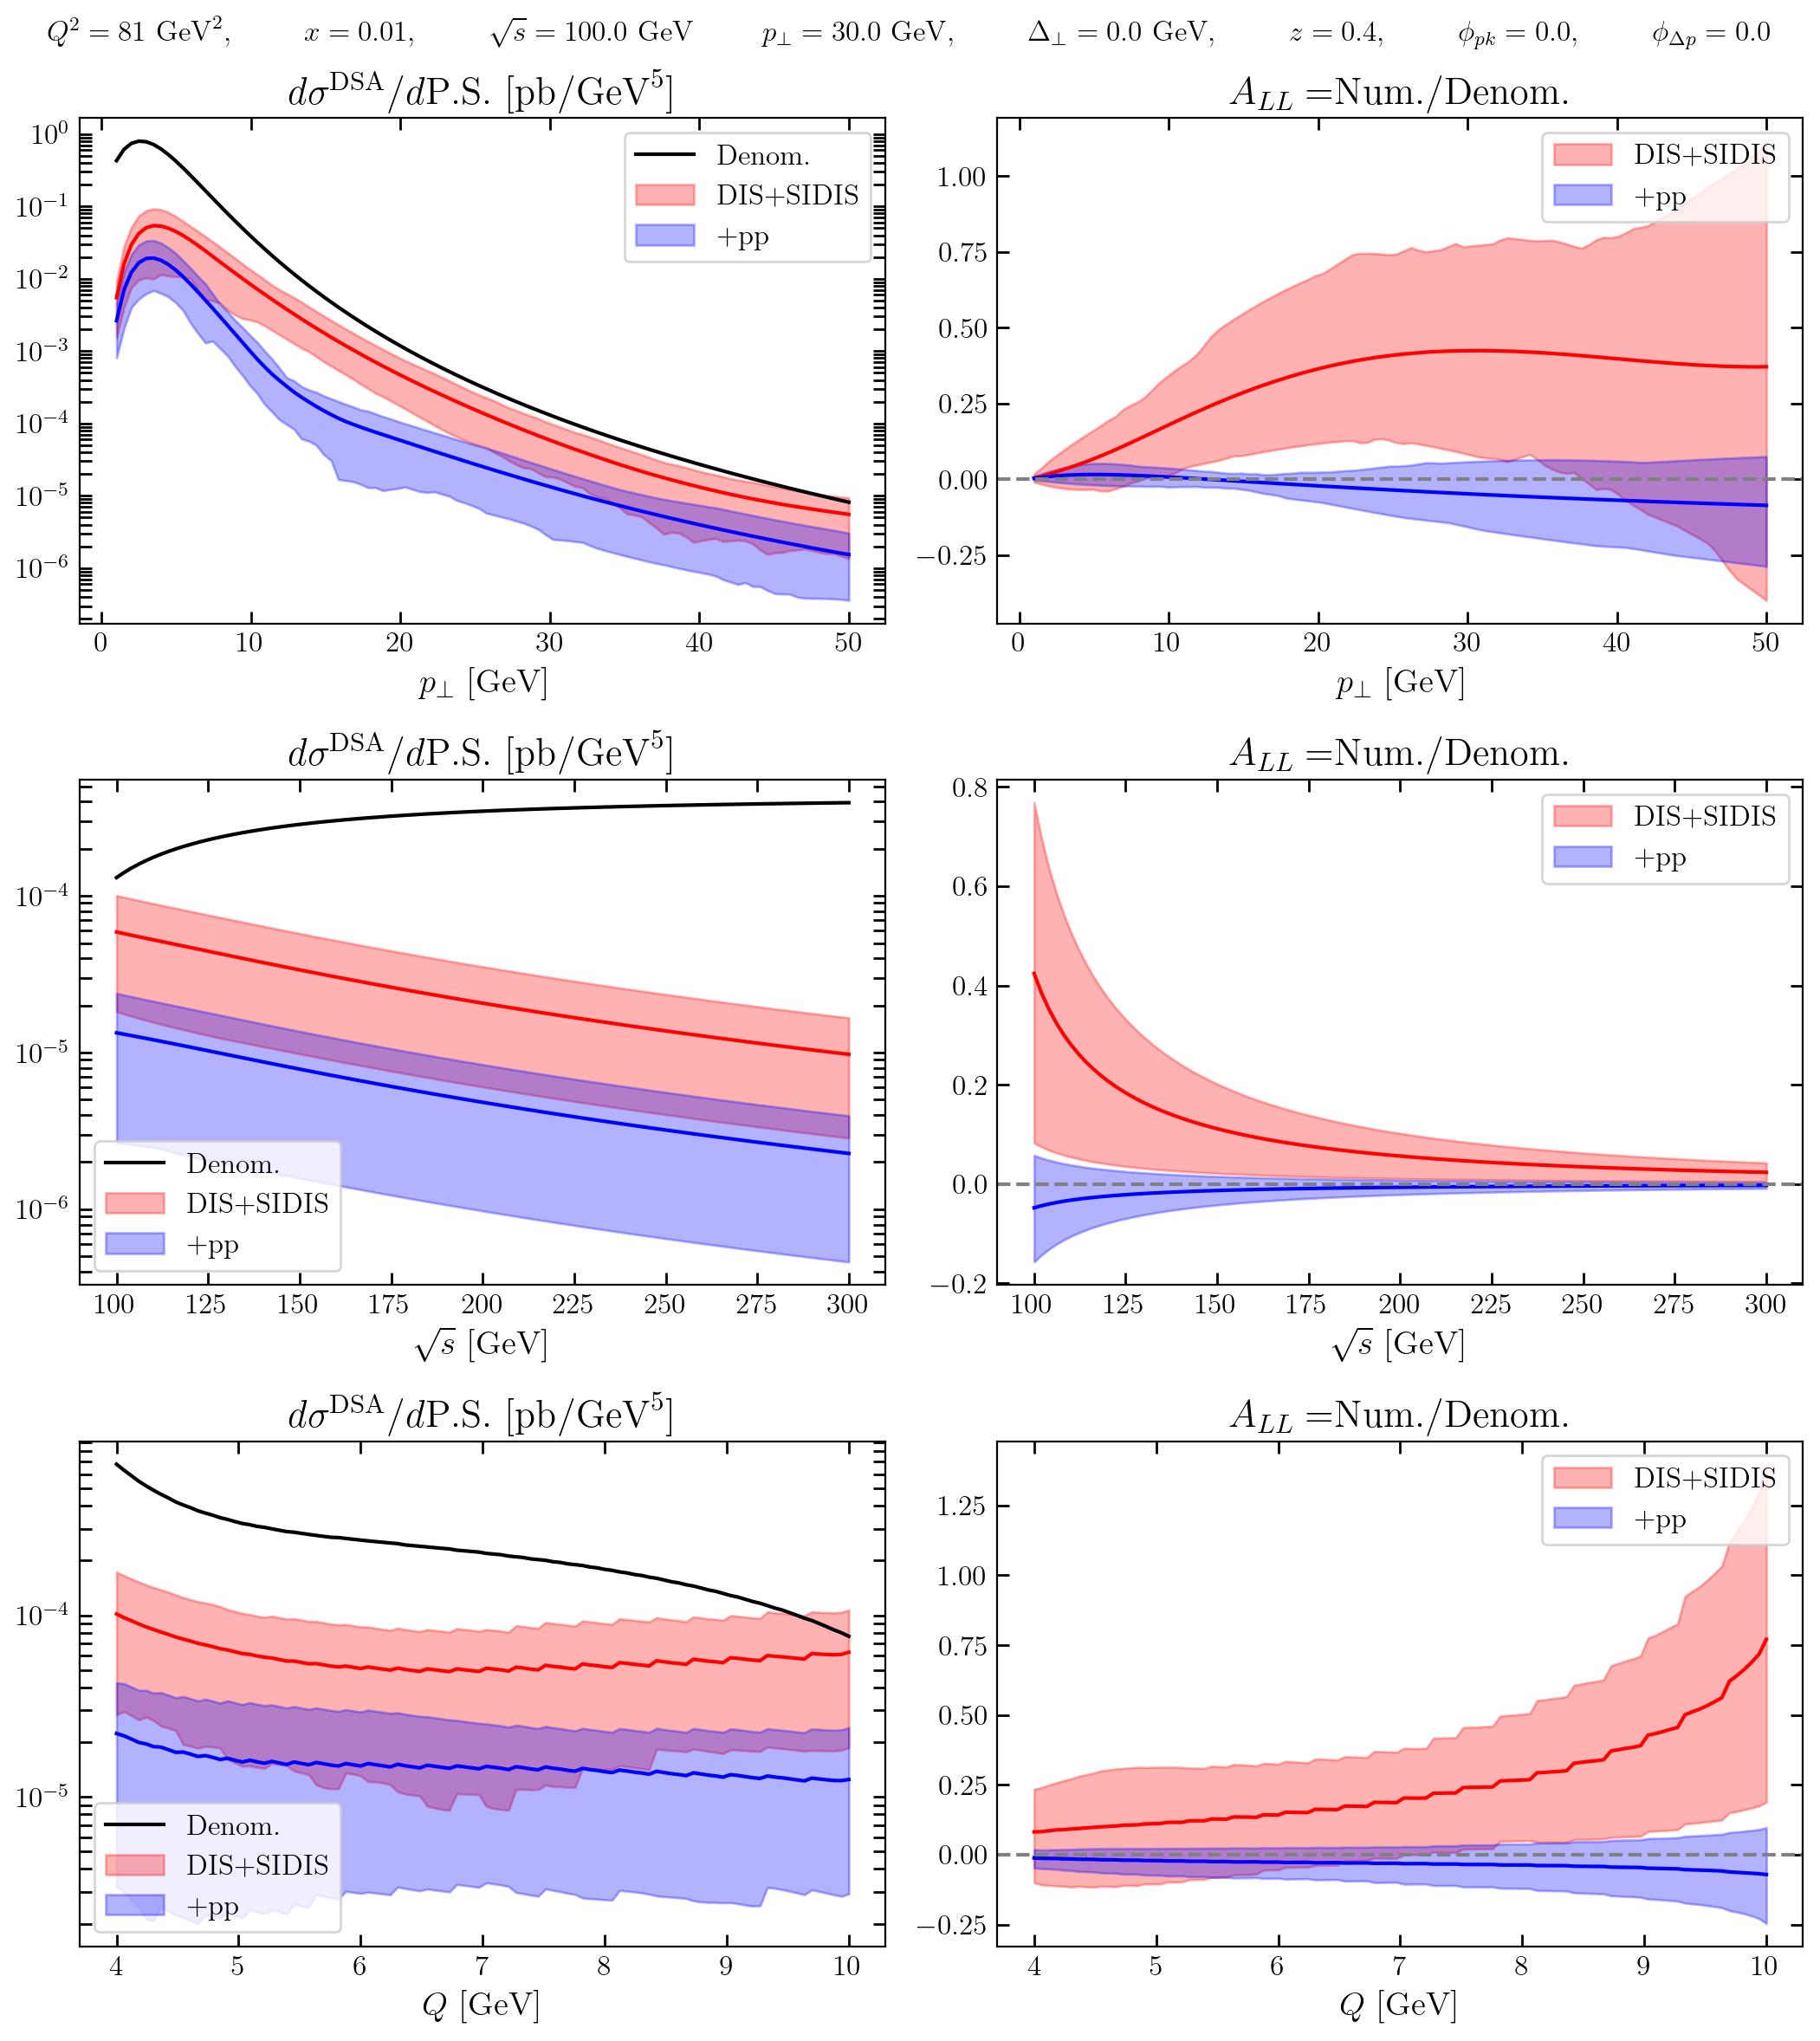

In [53]:
# plot spectra

asp_ratio = 4/3
psize = 4
fig, axs = plt.subplots(3, 2, figsize=(asp_ratio*psize*2, psize*3))

base_kins = get_base_kins()
base_str = fr'$Q^2={round(base_kins.Q**2,1)} \,\, \mathrm{{GeV}}^2, \hspace{{1cm}} x={base_kins.x}, \hspace{{1cm}}\sqrt{{s}}={np.sqrt(base_kins.s)} \,\, \mathrm{{GeV}}$'
base_str += fr'$\hspace{{1cm}} p_\perp ={base_kins.pT}\,\, \mathrm{{GeV}}, \hspace{{1cm}} \Delta_\perp ={base_kins.delta}\,\, \mathrm{{GeV}}, \hspace{{1cm}} z={base_kins.z}, \hspace{{1cm}} \phi_{{pk}}={base_kins.phi_kp}, \hspace{{1cm}}\phi_{{\Delta p}}={base_kins.phi_Dp}$'
fig.suptitle(base_str, fontsize=12)

plot_bands = True
colors = ['red', 'blue']
labels = ['DIS+SIDIS', '+pp']

for ivar, var in enumerate(['pT', 's', 'Q']):
    
    axs[ivar,0].plot(values[var], denom_data['dis+sidis'][var], label = 'Denom.', color='black')

    for ifit, fit in enumerate(['dis+sidis', '+pp']):

        if plot_bands: 
            axs[ivar,0].plot(values[var], num_bands[fit]['mean'][var], color=colors[ifit])
            axs[ivar,0].fill_between(values[var], num_bands[fit]['lower'][var], num_bands[fit]['upper'][var], color=colors[ifit], alpha=0.3, label=labels[ifit])

            axs[ivar,1].plot(values[var], ratio_bands[fit]['mean'][var], color=colors[ifit])
            axs[ivar,1].fill_between(values[var], ratio_bands[fit]['lower'][var], ratio_bands[fit]['upper'][var], color=colors[ifit], alpha=0.3, label=labels[ifit])

        else:
            for id, rep in enumerate(num[fit][var]):
                if id == 0:
                    axs[ivar,0].plot(values[var], np.abs(rep), color=colors[ifit], alpha=0.2, label=rf'$|\mathrm{{Num.}}|$ {labels[ifit]}')
                else:
                    axs[ivar,0].plot(values[var], np.abs(rep), color=colors[ifit], alpha=0.2)
    
                if id == 0:
                    axs[ivar,1].plot(values[var], np.array(rep)/np.array(denom['dis+sidis'][var]), color=colors[ifit], alpha=0.2, label=labels[ifit])
                else:
                    axs[ivar,1].plot(values[var], np.array(rep)/np.array(denom['dis+sidis'][var]), color=colors[ifit], alpha=0.2)

    
axs[0,0].set_xlabel(r'$p_{\perp}$ [GeV]')
axs[0,0].set_title(fr'$d\sigma^{{\mathrm{{DSA}}}}/d \mathrm{{P.S.}} \,\,[\mathrm{{pb}}/ \mathrm{{GeV}}^5]$')
axs[0,0].legend()
axs[0,0].semilogy()
# ax.set_ylim([-0.000005, 0.000005])
axs[0,0].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

axs[0,1].set_xlabel(r'$p_{\perp}$ [GeV]')
axs[0,1].set_title(fr'$A_{{LL}}=$Num./Denom.')
# axs[0,1].axhline(y=1, color='grey', linestyle=':')
axs[0,1].axhline(y=0, color='grey', linestyle='--')
# axs[0,1].axhline(y=-1, color='grey', linestyle=':')
# axs[1].semilogy()
axs[0,1].legend()
# axs[0,1].set_ylim([-1.1, 1.1])
axs[0,1].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)


axs[1,0].set_xlabel(r'$\sqrt{s}$ [GeV]')
axs[1,0].set_title(fr'$d\sigma^{{\mathrm{{DSA}}}}/d \mathrm{{P.S.}} \,\,[\mathrm{{pb}}/ \mathrm{{GeV}}^5]$')
axs[1,0].legend()
axs[1,0].semilogy()
# ax.set_ylim([-0.000005, 0.000005])
axs[1,0].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

axs[1,1].set_xlabel(r'$\sqrt{s}$ [GeV]')
axs[1,1].set_title(fr'$A_{{LL}}=$Num./Denom.')
# axs[1,1].axhline(y=1, color='grey', linestyle=':')
axs[1,1].axhline(y=0, color='grey', linestyle='--')
# axs[1,1].axhline(y=-1, color='grey', linestyle=':')
# axs[1].semilogy()
axs[1,1].legend()
# axs[1,1].set_ylim([-1.1, 1.1])
axs[1,1].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)


axs[2,0].set_xlabel(r'$Q$ [GeV]')
axs[2,0].set_title(fr'$d\sigma^{{\mathrm{{DSA}}}}/d \mathrm{{P.S.}} \,\,[\mathrm{{pb}}/ \mathrm{{GeV}}^5]$')
axs[2,0].legend()
axs[2,0].semilogy()
# ax.set_ylim([-0.000005, 0.000005])
axs[2,0].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

axs[2,1].set_xlabel(r'$Q$ [GeV]')
axs[2,1].set_title(fr'$A_{{LL}}=$Num./Denom.')
# axs[2,1].axhline(y=1, color='grey', linestyle=':')
axs[2,1].axhline(y=0, color='grey', linestyle='--')
# axs[2,1].axhline(y=-1, color='grey', linestyle=':')
# axs[1].semilogy()
axs[2,1].legend()
# axs[2,1].set_ylim([-1.1, 1.1])
axs[2,1].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)


plt.tight_layout()
plt.show()

if plot_bands:
    fig.savefig('plots/dsa_band.pdf', dpi=400, bbox_inches="tight")
else:
    fig.savefig('plots/dsa_lines.pdf', dpi=400, bbox_inches="tight")



In [87]:
# calc g1(x) and \Delta \Sigma


hel_replicas = {}

for fit in ['dis+sidis', '+pp']:
    hel_replicas[fit] = {}
    for func in ['g1', 'xsigma', 'xg']:
        hel_replicas[fit][func] = []
       
x_values = np.logspace(-4, -1, num=50)
hel_kins = dijet.Kinematics(Q=np.sqrt(10), x=0.005)

djs = {}
djs['dis+sidis'] = dijet.DIJET()
djs['+pp'] = dijet.DIJET()
djs['+pp'].load_params('replica_params_pp.csv')

for irep in range(1, 501):
    if irep > 100: break
    nrep = random.randint(1,398)

    for fit in ['dis+sidis', '+pp']:
        djs[fit].set_params(nrep)
        print(irep, nrep)
        
        rep = {}
        for func in ['g1', 'xsigma', 'xg']:
            rep[func] = []

        for ix, x in enumerate(x_values):
            hel_kins.x = x
            
            g1_value = djs[fit].get_g1(hel_kins)
            xsigma_value = x*djs[fit].get_DeltaSigma(hel_kins)
            xg_value = x*djs[fit].get_DeltaG(hel_kins)
            
            rep['g1'].append(g1_value)
            rep['xsigma'].append(xsigma_value)
            rep['xg'].append(xg_value)
                    
        hel_replicas[fit]['g1'].append(rep['g1'])
        hel_replicas[fit]['xsigma'].append(rep['xsigma'])
        hel_replicas[fit]['xg'].append(rep['xg'])

        np.save('predictions/ppdfs.npy', hel_replicas, allow_pickle=True)
        # np.save('predictions/dsa_num.npy', num, allow_pickle=True)
    

Using N data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
loaded params from replica_params_old.csv
Using N data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
loaded params from replica_params_old.csv
loaded params from replica_params_pp.csv
1 172
1 172
2 110
2 110
3 266
3 266
4 208
4 208
5 38
5 38
6 281
6 281
7 298
7 298
8 271
8 271
9 66
9 66
10 391
10 391
11 172
11 172
12 317
12 317
13 24
13 24
14 94
14 94
15 32
15 32
16 268
16 268
17 272
17 272
18 249
18 249
19 16
19 16
20 197
20 197
21 394
21 394
22 19
22 19
23 210
23 210
24 280
24 280
25 148
25 148
26 383
26 383
27 63
27 63
28 103
28 103
29 116
29 116
30 170
30 170
31 54
31 54
32 255
32 255
33 306
33 306
34 199
34 199
35 154
35 154
36 387
36 387
37 132
37 132
38 273
38 273
39 28
39 28
40 172
40 172
41 354
41 354
42 320
42 320
43 94
43 94
44 280
44 280
45 365
45 365
46 159
46 159
47 262
47 262
48 43
48 43
49 357
49 357
50 66
50 

In [89]:
# calculate bands 

confid = 68
hdata = np.load('predictions/ppdfs.npy', allow_pickle=True).item()

hbands = {}
for fit in ['dis+sidis', '+pp']:
    hbands[fit] = {}
    for pdf in ['g1', 'xsigma', 'xg']:
        hbands[fit][pdf] = {}
        for func in ['upper', 'lower', 'mean']:
            hbands[fit][pdf][func] = []
    
        hbands[fit][pdf]['upper'] = np.percentile(hdata[fit][pdf], 0.5*(100-confid), axis=0)
        hbands[fit][pdf]['lower'] = np.percentile(hdata[fit][pdf], 100 - 0.5*(100-confid), axis=0)
        hbands[fit][pdf]['mean']  = np.mean(hdata[fit][pdf], axis=0)



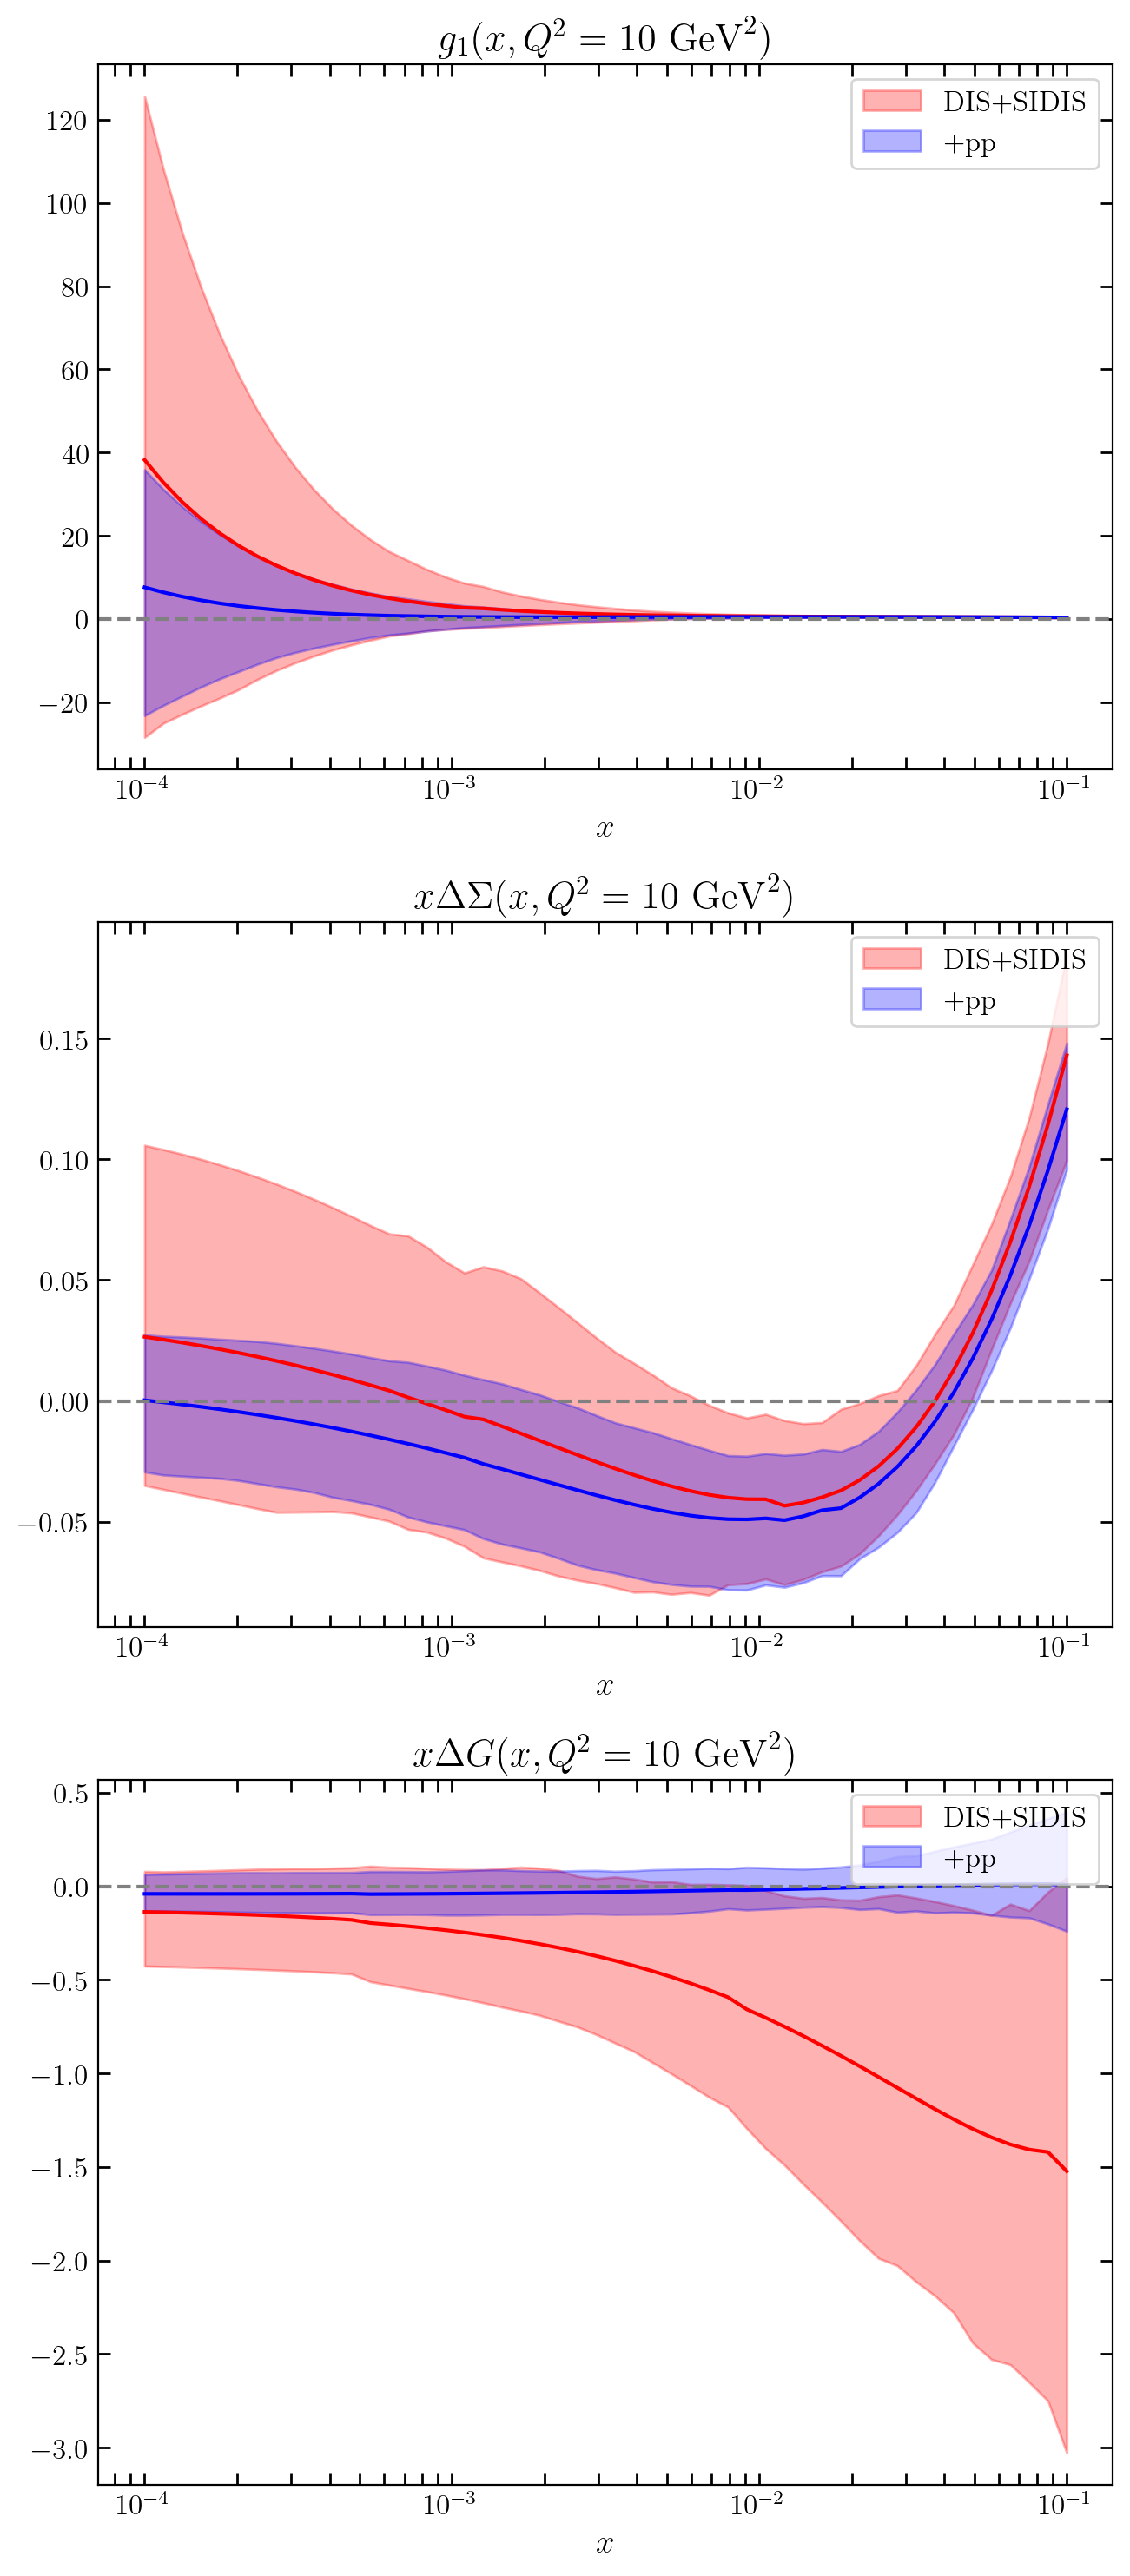

In [93]:
# plot g1(x) and \Delta \Sigma replicas
asp_ratio = 4/3
psize = 5
fig, axs = plt.subplots(3, 1, figsize=(asp_ratio*psize, psize*3))

plot_bands = True

colors = ['red', 'blue']
labels = ['DIS+SIDIS', '+pp']
for ifit, fit in enumerate(['dis+sidis', '+pp']):
    for ipdf, pdf in enumerate(['g1', 'xsigma', 'xg']):
        
        if plot_bands:
            axs[ipdf].plot(x_values, hbands[fit][pdf]['mean'], color=colors[ifit])
            axs[ipdf].fill_between(x_values, hbands[fit][pdf]['lower'], hbands[fit][pdf]['upper'], color=colors[ifit], alpha=0.3, label=labels[ifit])
        else:
            for irep, rep in enumerate(hdata[fit][pdf]):
                if irep == 0:
                    axs[ipdf].plot(x_values, rep, color=colors[ifit], alpha=0.2, label=labels[ifit])
                else:
                    axs[ipdf].plot(x_values, rep, color=colors[ifit], alpha=0.2)
    
axs[0].axhline(y=0, color='grey', linestyle='--')
axs[0].set_xlabel(r'$x$')
axs[0].set_title(r'$g_1(x, Q^2 = 10\,\,\mathrm{GeV}^2)$')
axs[0].legend()
axs[0].semilogx()
# axs[0].set_ylim([10, 3*10**7])
axs[0].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

    
axs[1].axhline(y=0, color='grey', linestyle='--')
axs[1].set_xlabel(r'$x$')
axs[1].set_title(r'$x \Delta \Sigma(x, Q^2 = 10\,\,\mathrm{GeV}^2)$')
axs[1].legend()
axs[1].semilogx()
# ax.set_ylim([10, 3*10**7])
axs[1].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

    
axs[2].axhline(y=0, color='grey', linestyle='--')
axs[2].set_xlabel(r'$x$')
axs[2].set_title(r'$x \Delta G(x, Q^2 = 10\,\,\mathrm{GeV}^2)$')
axs[2].legend()
axs[2].semilogx()
# ax.set_ylim([10, 3*10**7])
axs[2].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)


plt.tight_layout()
plt.show()


if plot_bands:
    fig.savefig('plots/ppdf_band.pdf', dpi=400, bbox_inches="tight")
else:
    fig.savefig('plots/ppdf_lines.pdf', dpi=400, bbox_inches="tight")




In [75]:
# compute the azimuthal correlations

dijet_kins = dijet.Kinematics(Q=6, z=0.4, x= 0.01, s=120**2, delta=0.2)
dijet_kins.y = (dijet_kins.Q**2)/(dijet_kins.s*dijet_kins.x)
assert dijet_kins.y <= 1, 'y > 1'

pT_values = np.linspace(1,40,100)
dj = dijet.DIJET()
dj_pp = dijet.DIJET(gauss_param=0, mv_only=False)
dj_pp.load_params('replica_params_pp.csv')

replicas = {}
replicas['dis+sidis'] = []
replicas['+pp'] = []

for irep in range(500):
    if irep > 100: break
    print(irep)
    nrep = random.randint(1,398)
    
    dj.set_params(nrep)
    dj_pp.set_params(nrep)

    rep_dis = {}
    rep_dis['<1>'] = []
    rep_dis['<cos(phi_Dp)>'] = []
    rep_dis['<cos(phi_Dp)cos(phi_kp)>'] = []
    rep_dis['<sin(phi_Dp)sin(phi_kp)>'] = []

    rep_pp = {}
    rep_pp['<1>'] = []
    rep_pp['<cos(phi_Dp)>'] = []
    rep_pp['<cos(phi_Dp)cos(phi_kp)>'] = []
    rep_pp['<sin(phi_Dp)sin(phi_kp)>'] = []
    
    for pT in pT_values:
        dijet_kins.pT = pT

        rep_dis['<1>'].append(dj.get_correlation(dijet_kins, '<1>'))
        rep_dis['<cos(phi_Dp)>'].append(dj.get_correlation(dijet_kins, '<cos(phi_Dp)>'))
        rep_dis['<cos(phi_Dp)cos(phi_kp)>'].append(dj.get_correlation(dijet_kins, '<cos(phi_Dp)cos(phi_kp)>'))
        rep_dis['<sin(phi_Dp)sin(phi_kp)>'].append(dj.get_correlation(dijet_kins, '<sin(phi_Dp)sin(phi_kp)>'))

        rep_pp['<1>'].append(dj_pp.get_correlation(dijet_kins, '<1>'))
        rep_pp['<cos(phi_Dp)>'].append(dj_pp.get_correlation(dijet_kins, '<cos(phi_Dp)>'))
        rep_pp['<cos(phi_Dp)cos(phi_kp)>'].append(dj_pp.get_correlation(dijet_kins, '<cos(phi_Dp)cos(phi_kp)>'))
        rep_pp['<sin(phi_Dp)sin(phi_kp)>'].append(dj_pp.get_correlation(dijet_kins, '<sin(phi_Dp)sin(phi_kp)>'))

    replicas['dis+sidis'].append(rep_dis)
    replicas['+pp'].append(rep_pp)

    np.save('predictions/dsa_corrs.npy', replicas, allow_pickle=True)


Using N data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
loaded params from replica_params_old.csv
Using N data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
loaded params from replica_params_old.csv
loaded params from replica_params_pp.csv
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [63]:
# calculate bands for correlations

corr_data = np.load('predictions/dsa_corrs.npy', allow_pickle=True).item()

confid = 68

corr_bands = {}
for fit in ['dis+sidis', '+pp']:
    corr_bands[fit] = {}
    for obj in ['lower', 'upper', 'mean']:
        corr_bands[fit][obj] = {}

    for corr in corr_data['dis+sidis'][0].keys():
        corr_reps = [rep[corr] for rep in corr_data[fit]]
        corr_bands[fit]['lower'][corr] = np.percentile(corr_reps, 0.5*(100-confid), axis=0)
        corr_bands[fit]['upper'][corr] = np.percentile(corr_reps, 100 - 0.5*(100-confid), axis=0)
        corr_bands[fit]['mean'][corr] = np.mean(corr_reps, axis=0)



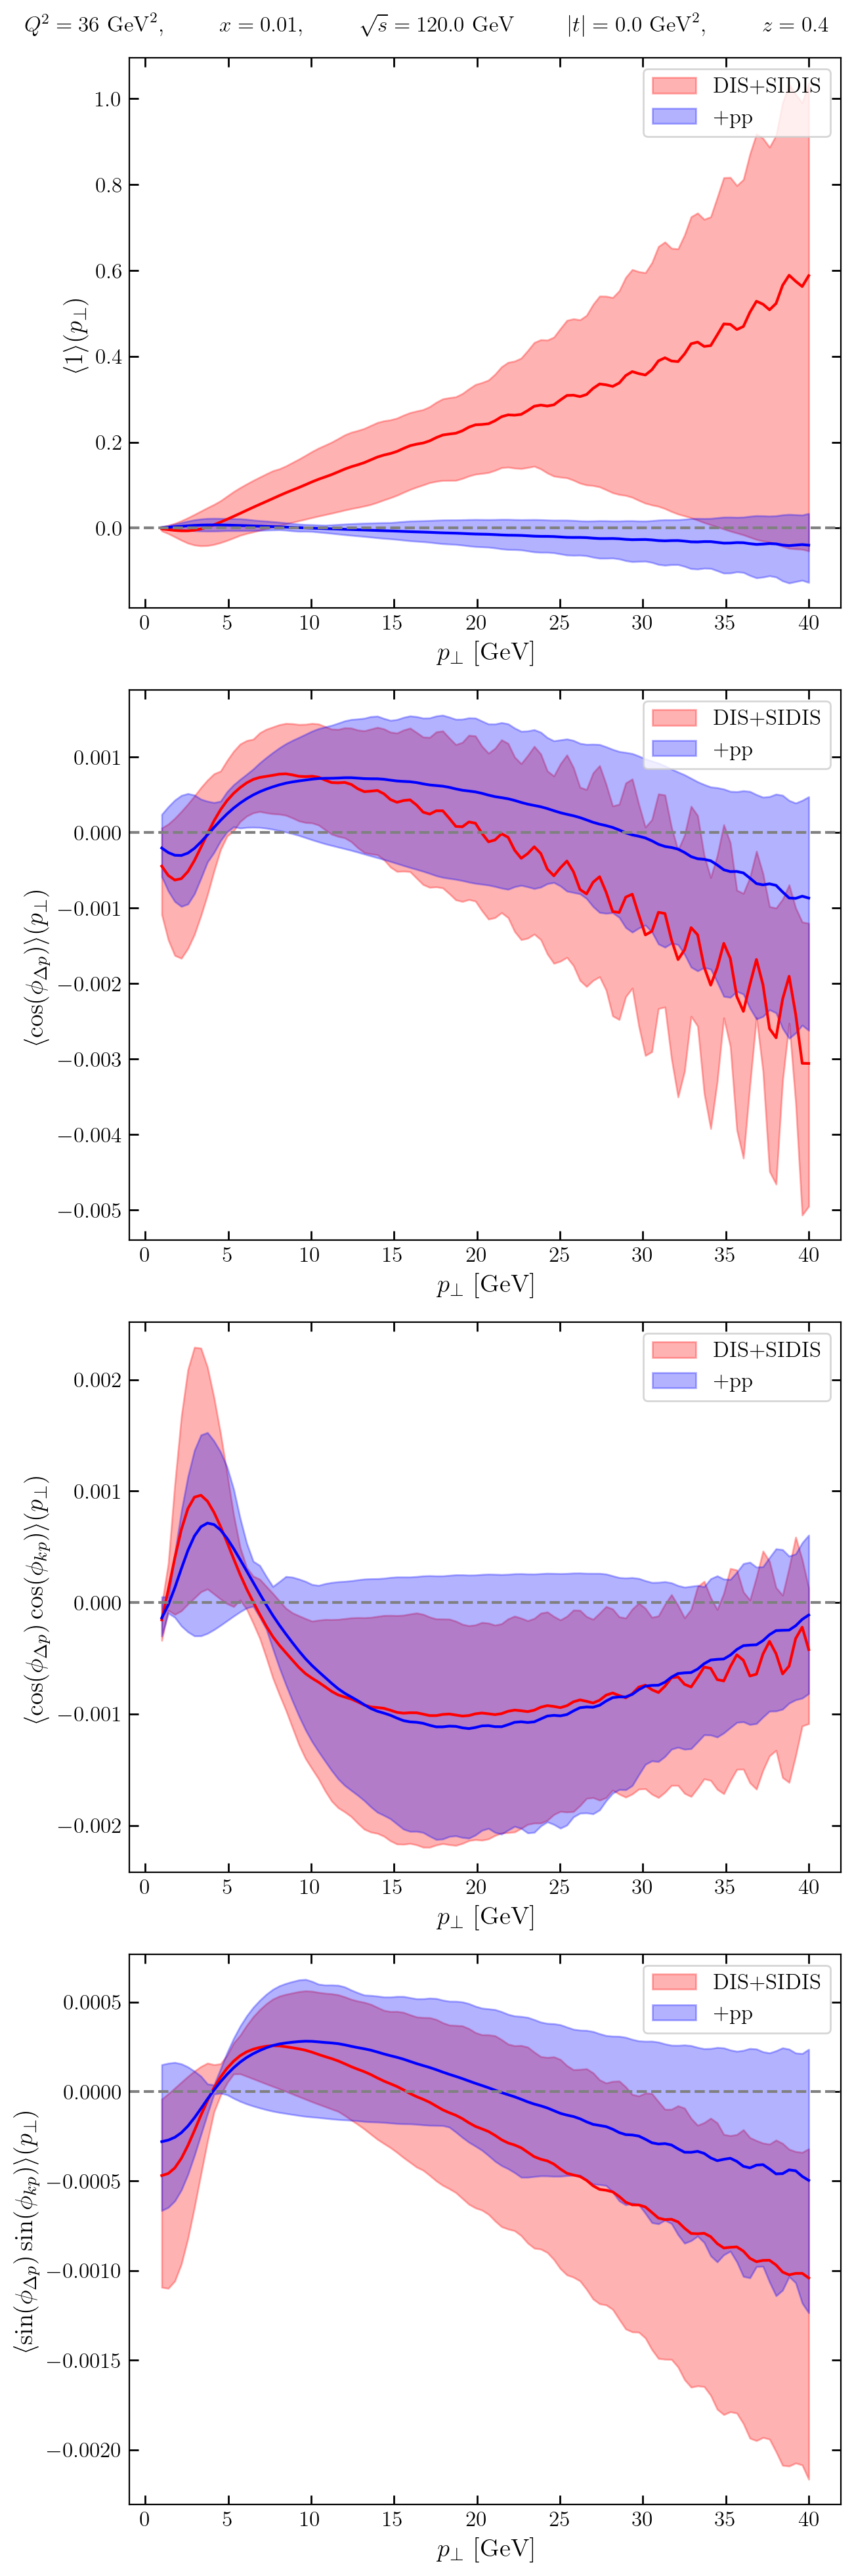

In [95]:
# plot azimuthal correlations
asp_ratio = 4/3
psize = 5

fig, axs = plt.subplots(4, 1, figsize=(asp_ratio*psize, psize*4))

dijet_str = fr'$Q^2={round(dijet_kins.Q**2,1)} \,\, \mathrm{{GeV}}^2, \hspace{{1cm}} x={dijet_kins.x}, \hspace{{1cm}}\sqrt{{s}}={np.sqrt(dijet_kins.s)} \,\, \mathrm{{GeV}}$'
dijet_str += fr'$\hspace{{1cm}} |t| ={round(dijet_kins.delta**2,1)}\,\, \mathrm{{GeV}}^2, \hspace{{1cm}} z={dijet_kins.z}$'
fig.suptitle(dijet_str, fontsize=12)

# pT_values = np.linspace(1,20,50)
plot_bands = True

colors = ['red', 'blue']
labels = ['DIS+SIDIS', '+pp']

for ifit, fit in enumerate(['dis+sidis', '+pp']):
    
    for icorr, corr in enumerate(corr_data[fit][0].keys()):
        if plot_bands:
            axs[icorr].plot(pT_values, corr_bands[fit]['mean'][corr], color=colors[ifit])
            axs[icorr].fill_between(pT_values, corr_bands[fit]['lower'][corr], corr_bands[fit]['upper'][corr], color=colors[ifit], alpha=0.3, label=labels[ifit])
        
        else:
            for irep, rep in enumerate(corr_data[fit]):
                axs[icorr].plot(pT_values, rep[corr], alpha=0.2, color=colors[ifit])

# axs[0].axhline(y=1, color='grey', linestyle=':')
# axs[0].axhline(y=-1, color='grey', linestyle=':')
axs[0].axhline(y=0, color='grey', linestyle='--')
axs[0].set_xlabel(r'$p_{\perp}$ [GeV]')
axs[0].set_ylabel(fr'$ \langle 1 \rangle (p_\perp)$')
axs[0].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
axs[0].legend()
# axs[0].semilogy()
# axs[0].set_ylim([-1.5, 1.5])

axs[1].axhline(y=0, color='grey', linestyle='--')
axs[1].set_xlabel(r'$p_{\perp}$ [GeV]')
axs[1].set_ylabel(fr'$ \langle \cos(\phi_{{\Delta p}}) \rangle (p_\perp)$')
axs[1].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
axs[1].legend()
# axs[1].set_ylim([-1.5, 1.5])


axs[2].axhline(y=0, color='grey', linestyle='--')
axs[2].set_xlabel(r'$p_{\perp}$ [GeV]')
axs[2].set_ylabel(fr'$ \langle \cos(\phi_{{\Delta p}}) \cos(\phi_{{k p}}) \rangle (p_\perp)$')
axs[2].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
axs[2].legend()
# axs[2].set_ylim([-1.5, 1.5])

axs[3].axhline(y=0, color='grey', linestyle='--')
axs[3].set_xlabel(r'$p_{\perp}$ [GeV]')
axs[3].set_ylabel(fr'$ \langle \sin(\phi_{{\Delta p}}) \sin(\phi_{{k p}})  \rangle (p_\perp)$')
axs[3].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
axs[3].legend()
# axs[3].set_ylim([-1.5, 1.5])
# axs[1].legend()
    # axs[0].semilogy()
    # ax.set_ylim([10, 10**8])

plt.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()


if plot_bands:
    fig.savefig('plots/corr_band.pdf', dpi=400, bbox_inches="tight")
else:
    fig.savefig('plots/corr_lines.pdf', dpi=400, bbox_inches="tight")


In [67]:
# make Fourier-Bessel transform data

fb_kins = dijet.Kinematics()
fb_kins.Q = 6
fb_kins.s = 100**2
fb_kins.z = 0.4
fb_kins.pT = 20.0

dj = dijet.DIJET()

values = {}
values['pT'] = np.linspace(1, 50, 200)
values['x'] = np.logspace(-3.5, -2, 100)


fbs = {}
fbs['N'] = {}
fbs['Qu'] = {}

for var in ['pT', 'x']: 
    fbs['N'][var] = []
    fbs['Qu'][var] = []

for irep in range(500):
    if irep > 30: break 
    print(irep)
    nrep = random.randint(1,398)
    dj.set_params(nrep)
    
    pfb_rep = []
    fb_kins.x = 0.01
    w2 = (fb_kins.Q**2)*((1/fb_kins.x)-1)
    for pT in values['pT']:
        fb_kins.pT = pT

        if irep == 0:
            fbs['N']['pT'].append(dj.fourier_bessel(fb_kins, [[1,1,0,0]], 'N'))
    
        pfb_rep.append(dj.fourier_bessel(fb_kins, [[1,1,0,0]], 'Qu')/w2)

    fbs['Qu']['pT'].append(pfb_rep)


    pfb_rep = []
    fb_kins.pT = 20.0
    for x in values['x']:
        fb_kins.x = x

        w2 = (fb_kins.Q**2)*((1/x)-1)
        if irep == 0:
            fbs['N']['x'].append(dj.fourier_bessel(fb_kins, [[1,1,0,0]], 'N'))
    
        pfb_rep.append(dj.fourier_bessel(fb_kins, [[1,1,0,0]], 'Qu')/w2)

    fbs['Qu']['x'].append(pfb_rep)
  

Using N data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


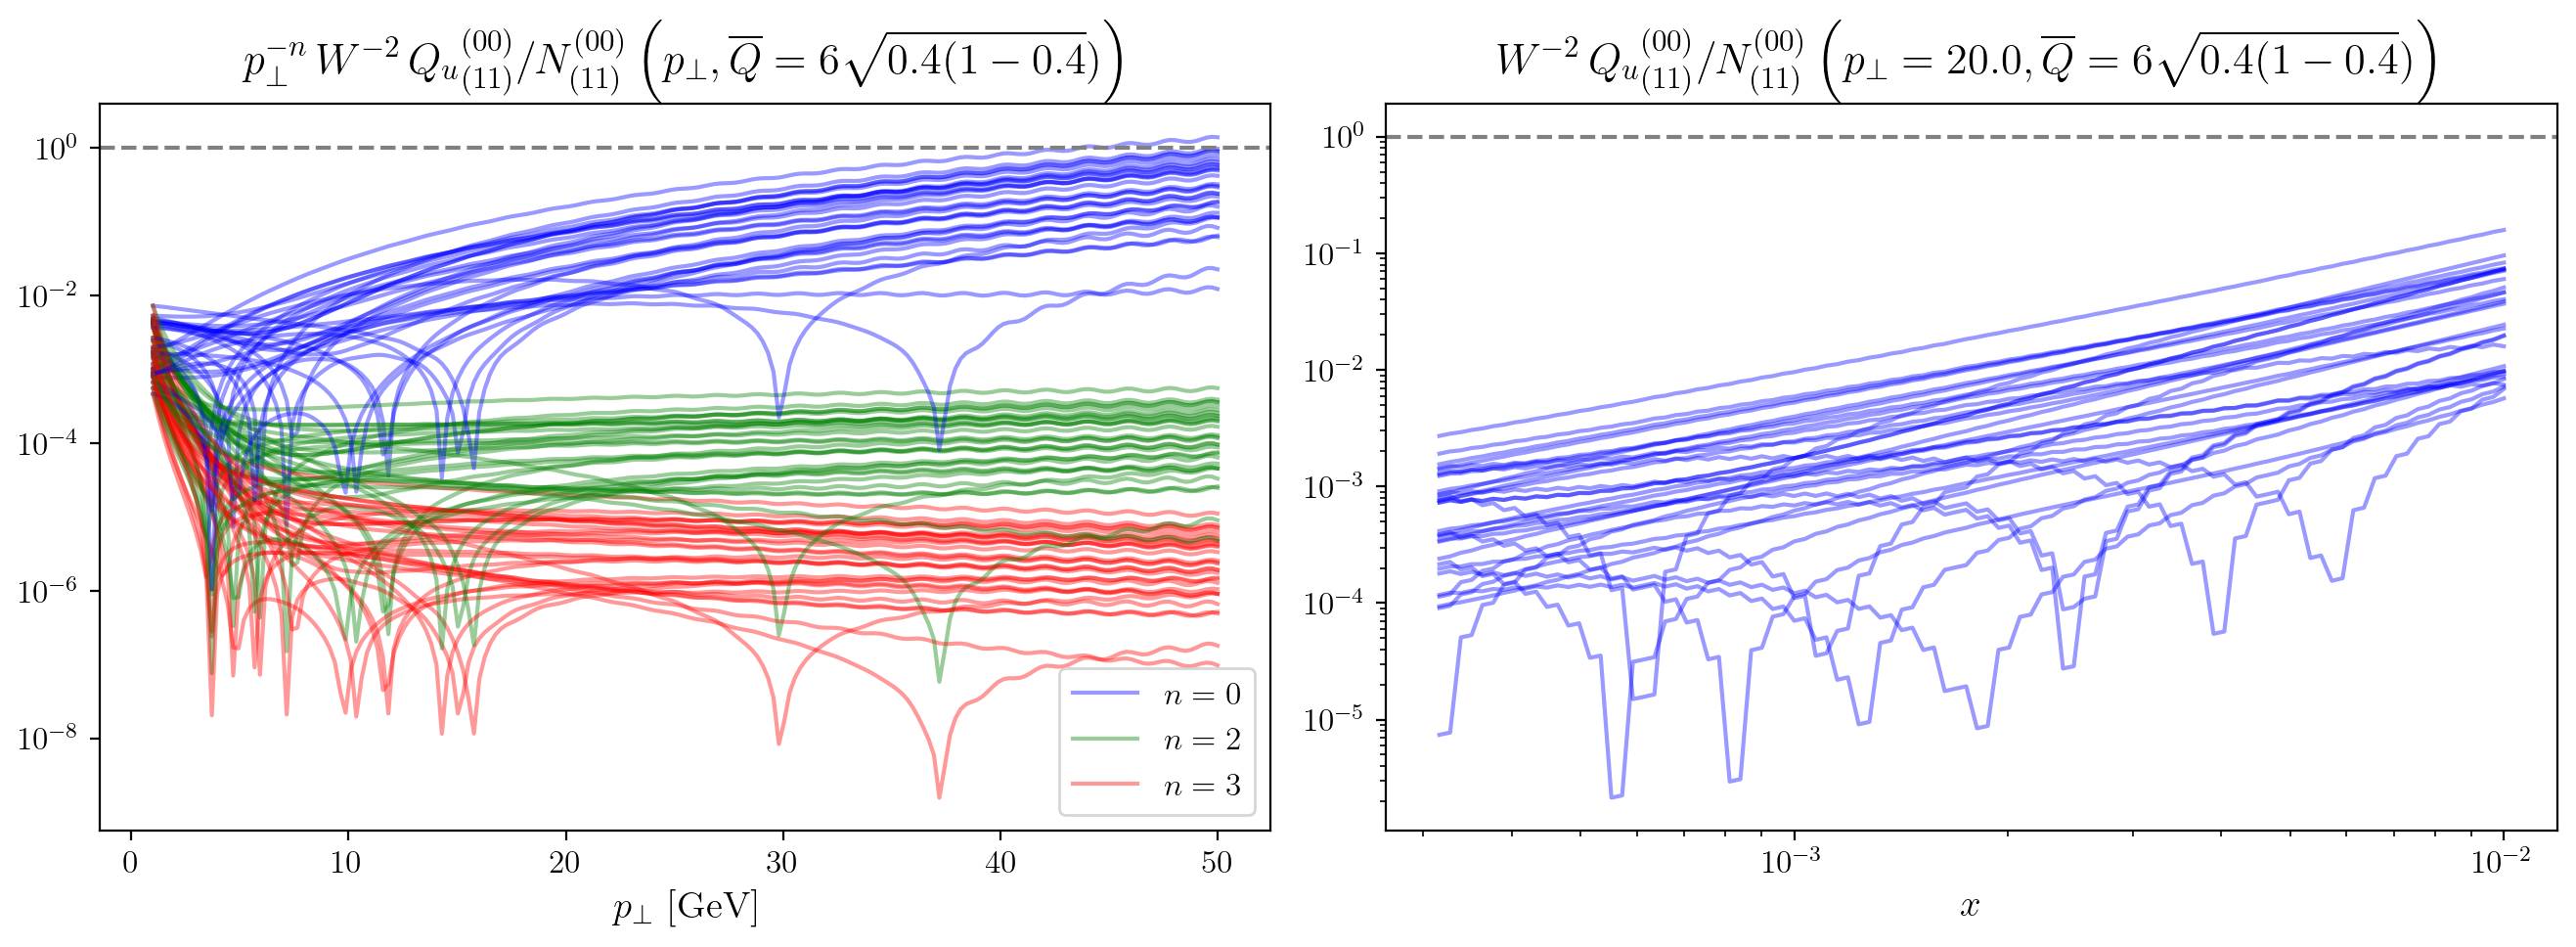

In [79]:
# plot FB transform 
asp_ratio = 4/3
psize = 5
fig, axs = plt.subplots(1, 2, figsize=(asp_ratio*psize*2, psize))

for irep in range(len(fbs['Qu']['x'])):
    if irep == 0: 
        label0 = r'$n=0$'
        label1 = r'$n=1$'
        label2 = r'$n=2$'
        label3 = r'$n=3$'
    else:
        label0, label1, label2, label3 = None, None, None, None
        
    axs[0].plot(values['pT'], ((1/values['pT'])**0)*(np.abs(fbs['Qu']['pT'][irep])/np.abs(fbs['N']['pT'])), alpha=0.4, color='blue', label=label0)
    # axs.plot(values['pT'], ((1/values['pT'])**1)*(np.abs(fbs['Qu'][irep])/np.abs(fbs['N'])), alpha=0.4, color='red', label=label1)
    axs[0].plot(values['pT'], ((1/values['pT'])**2)*(np.abs(fbs['Qu']['pT'][irep])/np.abs(fbs['N']['pT'])), alpha=0.4, color='green', label=label2)
    axs[0].plot(values['pT'], ((1/values['pT'])**3)*(np.abs(fbs['Qu']['pT'][irep])/np.abs(fbs['N']['pT'])), alpha=0.4, color='red', label=label3)


    axs[1].plot(values['x'], (np.abs(fbs['Qu']['x'][irep])/np.abs(fbs['N']['x'])), alpha=0.4, color='blue')


axs[0].axhline(y=1, color='grey', linestyle='--')
axs[0].set_xlabel(r'$p_{\perp}$ [GeV]')
axs[0].legend()
axs[0].axes.set_title(fr'$p_\perp^{{-n}}\, W^{{-2}} \, {{Q_u}}_{{(11)}}^{{(00)}}/N_{{(11)}}^{{(00)}} \left( p_\perp, \overline{{Q}} = {fb_kins.Q}\sqrt{{{fb_kins.z}(1-{fb_kins.z}}}) \right)$')
axs[0].semilogy()

axs[1].axhline(y=1, color='grey', linestyle='--')
axs[1].set_xlabel(r'$x$')
# axs[1].legend()
axs[1].axes.set_title(fr'$W^{{-2}} \, {{Q_u}}_{{(11)}}^{{(00)}}/N_{{(11)}}^{{(00)}} \left( p_\perp={fb_kins.pT}, \overline{{Q}} = {fb_kins.Q}\sqrt{{{fb_kins.z}(1-{fb_kins.z}}}) \right)$')
axs[1].semilogy()
axs[1].semilogx()

plt.tight_layout()
plt.show()

fig.savefig('plots/fb_ratio_ppreps.pdf', dpi=400, bbox_inches="tight")



In [69]:
# make data for FB contour plot

pT_values = np.linspace(1,30,100)
Q_values = np.linspace(1,10,100)
fb_kins = {'z': 0.4, 'x': 0.01} 

pT_grid = np.zeros((100, 100))
Q_grid = np.zeros((100, 100))
fb_grid = np.zeros((100, 100))

dj = dutils.DIJET(1)

for i, pT in enumerate(pT_values):
    for j, Q in enumerate(Q_values):

        pT_grid[i,j] = pT
        Q_grid[i,j] = Q*np.sqrt(0.4*(1-0.4))

        fb_kins['pT'] = pT
        fb_kins['Q'] = Q
        
        fb_value = np.log(np.abs(dj.fourier_bessel(fb_kins, [[1,1,0,0]], 'N')))
        fb_grid[i,j] = fb_value
        

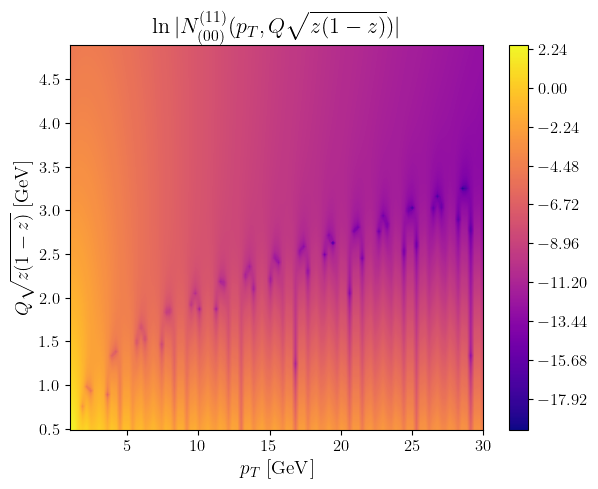

In [111]:
# make fb contour plot
asp_ratio = 4/3
psize = 5
fig, ax = plt.subplots(1, 1, figsize=(asp_ratio*psize, psize))

# ax.contour(pT_grid, Q_grid, fb_grid, levels=10, colors='black')
contour = ax.contourf(pT_grid, Q_grid, fb_grid, levels=300, cmap='plasma')  # More levels = smoother
cbar = fig.colorbar(contour, ax=ax)
ax.set_xlabel(r'$p_T\,\,[\mathrm{GeV}]$')
ax.set_ylabel(r'$Q \sqrt{z(1-z)} \,\,[\mathrm{GeV}]$')
ax.set_title(r'$\ln|N^{(11)}_{(00)} (p_T, Q \sqrt{z(1-z)})|$')

fig.savefig('fb_oscillation_map.png', dpi=700)

plt.show()

In [21]:
# compare IR regulating functions
pT_values = np.linspace(1,10,100)

zetas_g = [5, 10, 20]
zetas_s = [1, 2, 3]
cuts = [0, -1, -2]
test_r0 = 0.8

testIR_kins = {'Q':np.sqrt(5), 'z': 0.4, 'x': 0.01, 's': 100**2, 'delta':0.2, 'phi_Dp':0.0, 'phi_kp':0.0}
testIR_kins['y'] = (testIR_kins['Q']**2)/(testIR_kins['s']*testIR_kins['x'])

# fourier_bessel(self, kvar, indices, amp, lamIR = 0.3, IR_reg = [None, 0])

testQ_gauss = [np.array([dj.fourier_bessel({'pT': ipT} | testIR_kins, [0,0,0,0], 'Qu', IR_reg = ['gauss', zeta]) for ipT in pT_values]) for zeta in zetas_g]
testQ_skin = [np.array([dj.fourier_bessel({'pT': ipT} | testIR_kins, [0,0,0,0], 'Qu', IR_reg = ['skin', zeta, test_r0]) for ipT in pT_values]) for zeta in zetas_s]
testQ_cut = [np.array([dj.fourier_bessel({'pT': ipT} | testIR_kins, [0,0,0,0], 'Qu', IR_reg = ['cut', icut]) for ipT in pT_values]) for icut in cuts]



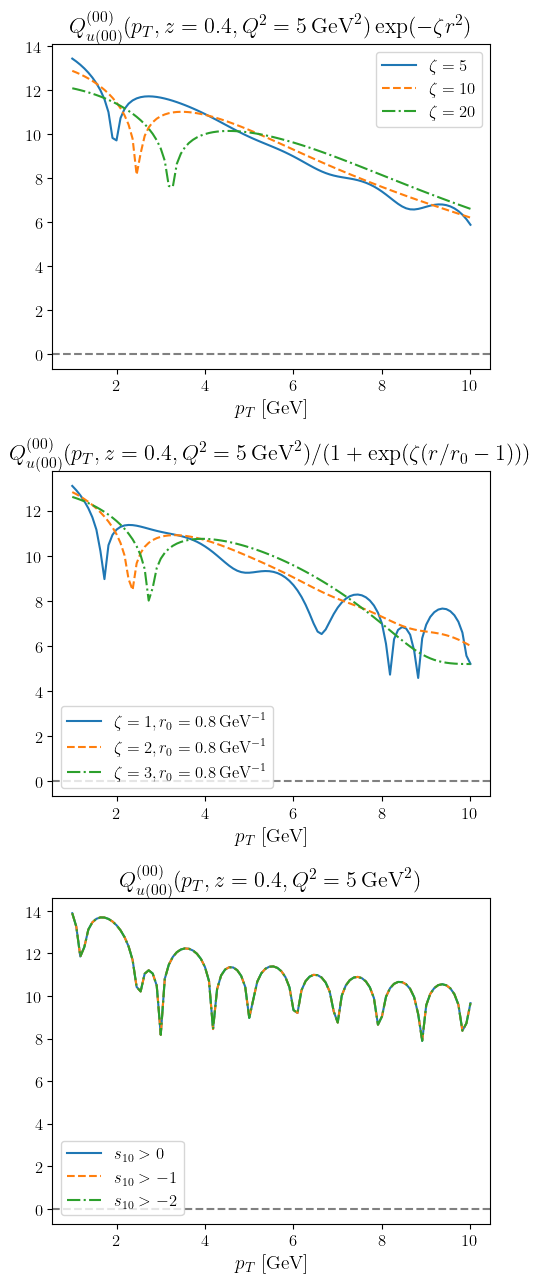

In [53]:
# IR regulator plots
fig, axes = plt.subplots(3,1, figsize=(5, 13))

lines = ['-', '--', '-.', ':']

for iz, zeta in enumerate(zetas_g):
    axes[0].plot(pT_values, np.log(np.abs(testQ_gauss[iz])), label = fr'$\zeta = {zeta}$', linestyle = lines[iz])

axes[0].axhline(y=0, color='grey', linestyle='--')
axes[0].set_xlabel(r'$p_{T}$ [GeV]')
axes[0].set_title(fr'$Q_{{u(00)}}^{{(00)}}(p_T, z={testIR_kins['z']}, Q^2={round(testIR_kins['Q']**2)}\,\mathrm{{GeV}}^2) \exp(-\zeta r^2)$')
axes[0].legend()
# axes[0].semilogy()

for iz, zeta in enumerate(zetas_s):
    axes[1].plot(pT_values, np.log(np.abs(testQ_skin[iz])), label = fr'$\zeta = {zeta}, r_0 = {test_r0}\, \mathrm{{GeV}}^{{-1}}$', linestyle = lines[iz])

axes[1].axhline(y=0, color='grey', linestyle='--')
axes[1].set_xlabel(r'$p_{T}$ [GeV]')
axes[1].set_title(fr'$Q_{{u(00)}}^{{(00)}}(p_T, z={testIR_kins['z']}, Q^2={round(testIR_kins['Q']**2)}\,\mathrm{{GeV}}^2)/(1 + \exp(\zeta (r/r_0 -1)))$')
axes[1].legend()
# axes[0].semilogy()

for ic, cut in enumerate(cuts):
    axes[2].plot(pT_values, np.log(np.abs(testQ_cut[ic])), label = fr'$s_{{10}} > {cut}$', linestyle = lines[ic])

axes[2].axhline(y=0, color='grey', linestyle='--')
axes[2].set_xlabel(r'$p_{T}$ [GeV]')
axes[2].set_title(fr'$Q_{{u(00)}}^{{(00)}}(p_T, z={testIR_kins['z']}, Q^2={round(testIR_kins['Q']**2)}\,\mathrm{{GeV}}^2)$')
axes[2].legend()
# axes[0].semilogy()

plt.tight_layout()
plt.show()


# fig.savefig(f"IR_regs{tag}.png")


